<a href="https://colab.research.google.com/github/Adrok24/NN_exercises/blob/master/use_dictionary_within_model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
from tensorflow.keras.models import load_model
from zipfile import ZipFile 
import os
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')
#files.download('file.csv')


model = load_model('drive/My Drive/model_with_data_aug.h5')
model.summary()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: "ResNet101"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
resnet101v2 (Functional)     (None, 2048)              42626560  
_________________________________________________________________
layer1_256 (Dense)           (None, 512)               1049088   
_________________________________________________________________
layer3_39 (Dense)            (None, 39)                20007     
Total params: 43,695,655
Trainable params: 1,069,095
Non-trainable params: 42,626,560
_________________________________________________________________


In [34]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Descargamos la imagen de un gato
!wget -nc -O cat.1700.jpg https://drek4537l1klr.cloudfront.net/allaire/Figures/05fig17.jpg

# Imagen de input
img_path = 'cat.1700.jpg'


def reescale_image(picture):

  # Leemos la imagen con tamaño (150, 150)
  img = image.load_img(picture, target_size=(150, 150))

  # La pasamos a array con img_to_array()
  # Le agregamos una dimensión con np.expand_dims() y normalizamos dividiendo por 255
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.
  return img_tensor

reescaled_image = reescale_image(img_path)


File ‘cat.1700.jpg’ already there; not retrieving.


In [35]:
import json 
  
# Opening JSON file 
with open('drive/My Drive/model_indices.json') as json_file: 
    label_map = json.load(json_file) 


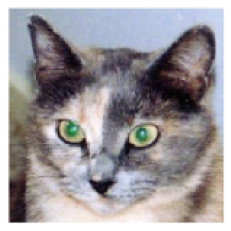

In [36]:
import matplotlib.pyplot as plt

plt.imshow(reescaled_image[0])
plt.axis('off')
plt.show()

In [37]:
y_prob = model.predict(reescaled_image)
y_predicted_class = y_prob.argmax(axis=-1)

def show_prediction(label_map, predicted_index):
  splitter = '__'
  for classification, index in label_map.items():
    if index == predicted_index:  
      if splitter in classification:
        tp,health = classification.split('__', 1)
        print(f'The predicted class is: {tp}, and its state is {health}' )
      else:
        print(classification)


show_prediction(label_map, y_predicted_class)



Background_without_leaves


In [38]:
!wget -nc -O leaf_3.jpg https://image.freepik.com/free-photo/tomato-leaf-closeup-isolated-white_55883-300.jpg

File ‘leaf_3.jpg’ already there; not retrieving.


In [39]:
img_path_2 = 'leaf_3.jpg'

img_tensor_2 = reescale_image(img_path_2)

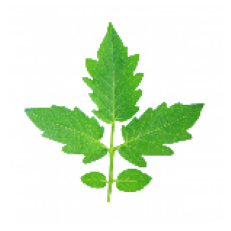

In [40]:
plt.imshow(img_tensor_2[0])
plt.axis('off')
plt.show()

In [41]:
y_prob = model.predict(img_tensor_2)
y_class = y_prob.argmax(axis=-1)

show_prediction(label_map, y_class)

The predicted class is: Tomato, and its state is _Septoria_leaf_spot


In [42]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)



Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
chro

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: use options instead of chrome_options
  if sys.path[0] == '':


In [43]:
def fetch_image_urls(query:str, max_links_to_fetch:int, wd:webdriver, sleep_between_interactions:int=1):
    def scroll_to_end(wd):
        wd.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(sleep_between_interactions)    
    
    # build the google query
    search_url = "https://www.google.com/search?safe=off&site=&tbm=isch&source=hp&q={q}&oq={q}&gs_l=img"

    # load the page
    wd.get(search_url.format(q=query))

    image_urls = set()
    image_count = 0
    results_start = 0
    while image_count < max_links_to_fetch:
        scroll_to_end(wd)

        # get all image thumbnail results
        thumbnail_results = wd.find_elements_by_css_selector("img.Q4LuWd")
        number_results = len(thumbnail_results)
        
        print(f"Found: {number_results} search results. Extracting links from {results_start}:{number_results}")
        
        for img in thumbnail_results[results_start:number_results]:
            # try to click every thumbnail such that we can get the real image behind it
            try:
                img.click()
                time.sleep(sleep_between_interactions)
            except Exception:
                continue

            # extract image urls    
            actual_images = wd.find_elements_by_css_selector('img.n3VNCb')
            for actual_image in actual_images:
                if actual_image.get_attribute('src') and 'http' in actual_image.get_attribute('src'):
                    image_urls.add(actual_image.get_attribute('src'))

            image_count = len(image_urls)

            if len(image_urls) >= max_links_to_fetch:
                print(f"Found: {len(image_urls)} image links, done!")
                break
        else:
            print("Found:", len(image_urls), "image links, looking for more ...")
            time.sleep(30)
            return
            load_more_button = wd.find_element_by_css_selector(".mye4qd")
            if load_more_button:
                wd.execute_script("document.querySelector('.mye4qd').click();")

        # move the result startpoint further down
        results_start = len(thumbnail_results)

    return image_urls

In [44]:
def persist_image(folder_path:str,url:str):
    try:
        image_content = requests.get(url).content

    except Exception as e:
        print(f"ERROR - Could not download {url} - {e}")

    try:
        image_file = io.BytesIO(image_content)
        image = Image.open(image_file).convert('RGB')
        file_path = os.path.join(folder_path,hashlib.sha1(image_content).hexdigest()[:10] + '.jpg')
        with open(file_path, 'wb') as f:
            image.save(f, "JPEG", quality=85)
        print(f"SUCCESS - saved {url} - as {file_path}")
    except Exception as e:
        print(f"ERROR - Could not save {url} - {e}")

In [45]:
def search_and_download(search_term:str,driver_path:str,target_path='./images',number_images=5):
    target_folder = os.path.join(target_path,'_'.join(search_term.lower().split(' ')))

    if not os.path.exists(target_folder):
        os.makedirs(target_folder)

    with webdriver.Chrome(executable_path=driver_path) as wd:
        res = fetch_image_urls(search_term, number_images, wd=wd, sleep_between_interactions=0.5)
        
    for elem in res:
        persist_image(target_folder,elem)

In [47]:


search_and_download('tomato healthy leaf', '/usr/bin/chromedriver', 'drive/My Drive/tomato_healthy_scrapped')

WebDriverException: ignored